Some code to generate plots for data analysis. Some code borrowed from GPT to save me from the tedious work.

/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 23

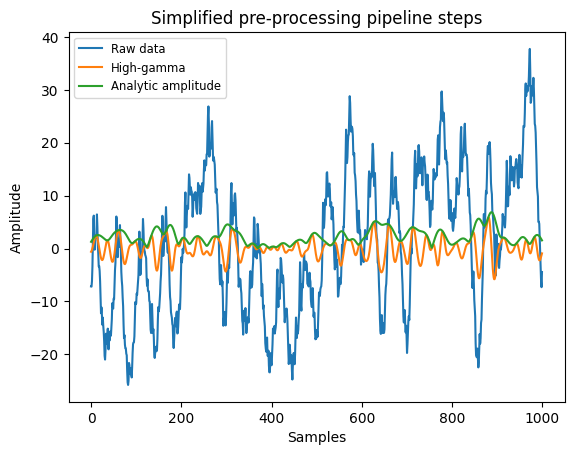

In [15]:
from pynwb import NWBHDF5IO
import numpy as np
import soundfile as sf
import os
import pandas as pd
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import butter, lfilter, filtfilt, hilbert
from matplotlib import pyplot as plt
# 6 penguisn

path = '/NWB/EFC401/EFC401_B4.nwb'
io = NWBHDF5IO(path, load_namespaces=True, mode='r')
nwbfile = io.read()
nwbfile
# nwbfile.trials[:] # ['transcription'][0]

bad_electrodes = [1,2,63,64,65,127,143,193,194,195,196,235,239,243,252,254,255,256]
bad_electrodes = [x - 1 for x in bad_electrodes]
good_electrodes = np.arange(0,256)
good_electrodes = [x for x in good_electrodes if x not in bad_electrodes]
print(good_electrodes)

sr = nwbfile.acquisition['ElectricalSeries'].\
                              rate

starts = list(nwbfile.trials[:]['start_time'] * sr)
stops = list(nwbfile.trials[:]['stop_time'] * sr)

starts = [int(start) for start in starts]
stops = [int(stop) for stop in stops]

electrode_table = nwbfile.acquisition['ElectricalSeries'].\
                                      electrodes.table[:]

indices = np.where(np.logical_or(electrode_table['group_name'] == 
                                    'L256GridElectrode electrodes', 
                                    electrode_table['group_name'] == 
                                    'R256GridElectrode electrodes'))[0]

nwbfile_electrodes = nwbfile.acquisition['ElectricalSeries'].\
                                data[:,indices]
                                
print(nwbfile_electrodes.shape)

w_l = 70 / (sr / 2) # Normalize the frequency
w_h = 199 / (sr / 2)
b, a = butter(5, [w_l,w_h], 'band')

nwbfile_electrodes = nwbfile_electrodes[:,good_electrodes] * 1000000
print(nwbfile_electrodes[starts[0]:starts[0] + 5, 0])
plt.plot(nwbfile_electrodes[starts[0]:starts[0] + 1000, 0], label='Raw data')
original = nwbfile_electrodes

print(nwbfile_electrodes.shape)
print(nwbfile_electrodes[:,0].shape)

for ch in range(nwbfile_electrodes.shape[1]):
    signal = nwbfile_electrodes[:, ch]
    nwbfile_electrodes[:,ch] = filtfilt(b, 
                                        a, 
                                        signal)
    
plt.plot(nwbfile_electrodes[starts[0]:starts[0] + 1000,0], label='High-gamma')
# print(nwbfile_electrodes.shape)
# print(starts[0], stops[0])
# print(nwbfile_electrodes[starts[0]:stops[0],:])

for ch in range(nwbfile_electrodes.shape[1]):
    signal = nwbfile_electrodes[:, ch]
    nwbfile_electrodes[:,ch] = np.abs(hilbert(signal))
    
plt.plot(nwbfile_electrodes[starts[0]:starts[0] + 1000,0], label='Analytic amplitude')

plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Simplified pre-processing pipeline steps')
plt.legend(fontsize='small')

import tikzplotlib

tikzplotlib.save("test.tex")


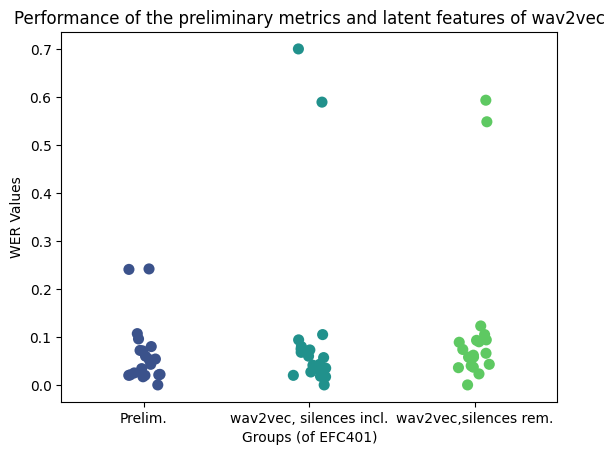

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# from scipy.stats import ranksums

wer_orig = [0.242, 0.241, 0.025, 0.022, 0.020, 0.017, 0.080, 0.043, 0.072, 0.021, 
            0.060, 0.021, 0.071, 0.020, 0.000, 0.034, 0.054, 0.053, 0.096, 0.107]
wer_w2v_sil_inc = [0.590, 0.701, 0.105, 0.068, 0.000, 0.042, 0.043, 0.041, 0.080, 0.094, 
                   0.027, 0.030, 0.017, 0.060, 0.035, 0.018, 0.020, 0.057, 0.073, 0.075]
wer_w2v_sil_rem = [0.549, 0.594, 0.123, 0.090, 0.058, 0.057, 0.043, 0.023, 0.074, 0.105,
                   0.037, 0.058, 0.093, 0.094, 0.036, 0.062, 0.040, 0.000, 0.066, 0.089]

# statistic, p = ranksums(wer_orig, wer_w2v_sil_rem, alternative='two-sided')
# p

data = [wer_orig, wer_w2v_sil_inc, wer_w2v_sil_rem]

group_labels = ['Prelim.', 'wav2vec, silences incl.', 'wav2vec,silences rem.']

sns.stripplot(data=data, jitter=True, color='black', size=8, palette='viridis')
plt.xticks(range(len(data)), group_labels)  # Set x-axis ticks and labels

# Add labels
plt.xlabel('Groups (of EFC401)')
plt.ylabel('WER Values')
plt.title('Performance of the preliminary metrics and latent features of wav2vec')

# Show the plot
# plt.show()

import tikzplotlib

tikzplotlib.save("test.tex")


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


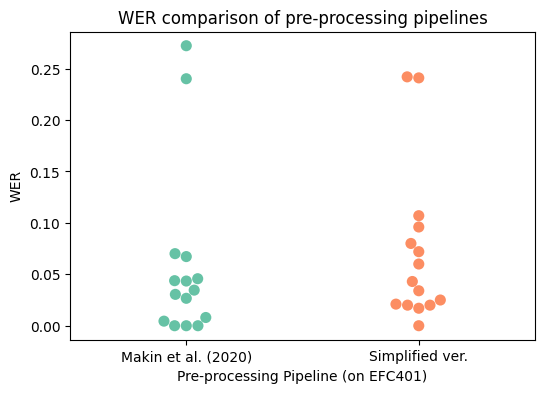

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
original = [0.02666667, 0.03048701, 0.0, 0.03460317, 0.00444444,
            0.04345238, 0.27226984, 0.008, 0.0700873, 0.06723016,
            0.0, 0.0, 0.04571429, 0.04380952, 0.24016666]

new_prep = [0.017, 0.025, 0.0, 0.072, 0.021, 0.02, 0.241, 0.02, 0.096, 
            0.107, 0.034, 0.08, 0.06, 0.043, 0.242]

# Combine data into a DataFrame
import pandas as pd

data = pd.DataFrame({'Pre-processing Pipeline': ['Makin et al. (2020)'] * len(original) + ['Simplified ver.'] * len(new_prep),
                     'WER': original + new_prep})

# Create swarm plot
plt.figure(figsize=(6, 4))
sns.swarmplot(x='Pre-processing Pipeline', y='WER', data=data, size=8, palette='Set2')

# Add labels and title
plt.xlabel('Pre-processing Pipeline (on EFC401)')
plt.ylabel('WER')
plt.title('WER comparison of pre-processing pipelines')

# Show plot
# plt.show()


import tikzplotlib

tikzplotlib.save("test.tex")

In [25]:
from scipy.stats import ranksums

wer_orig = [0.242, 0.241, 0.025, 0.022, 0.020, 0.017, 0.080, 0.043, 0.072, 0.021, 
            0.060, 0.021, 0.071, 0.020, 0.000, 0.034, 0.054, 0.053, 0.096, 0.107]
wer_w2v_sil_inc = [0.590, 0.701, 0.105, 0.068, 0.000, 0.042, 0.043, 0.041, 0.080, 0.094, 
                   0.027, 0.030, 0.017, 0.060, 0.035, 0.018, 0.020, 0.057, 0.073, 0.075]
wer_w2v_sil_rem = [0.549, 0.594, 0.123, 0.090, 0.058, 0.057, 0.043, 0.023, 0.074, 0.105,
                   0.037, 0.058, 0.093, 0.094, 0.036, 0.062, 0.040, 0.000, 0.066, 0.089]

statistic, p = ranksums(wer_w2v_sil_inc, wer_w2v_sil_rem, alternative='two-sided')
p

0.25029679750351186

0.003947751856903457


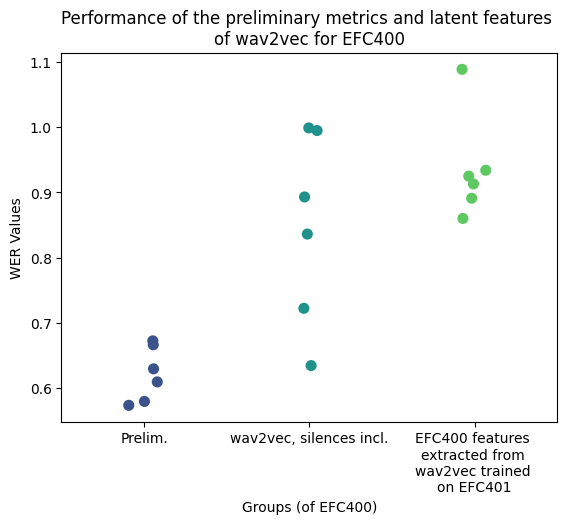

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# from scipy.stats import ranksums

wer_orig = [0.629, 0.672, 0.666, 0.579, 0.573, 0.609]
wer_w2v = [0.722, 0.893, 0.999, 0.634, 0.836, 0.995]
wer_w2v_401 = [0.925, 0.934, 0.860, 1.089, 0.891, 0.913]

statistic, p = ranksums(wer_orig, wer_w2v_401, alternative='two-sided')
print(p)

data = [wer_orig, wer_w2v, wer_w2v_401]

group_labels = ['Prelim.', 'wav2vec, silences incl.', 'EFC400 features \nextracted from \nwav2vec trained \non EFC401']

sns.stripplot(data=data, jitter=True, color='black', size=8, palette='viridis')
plt.xticks(range(len(data)), group_labels)  # Set x-axis ticks and labels

# Add labels
plt.xlabel('Groups (of EFC400)')
plt.ylabel('WER Values')
plt.title('Performance of the preliminary metrics and latent features \nof wav2vec for EFC400')

# Show the plot
# plt.show()

import tikzplotlib

tikzplotlib.save("test.tex")


0.004071994217732759


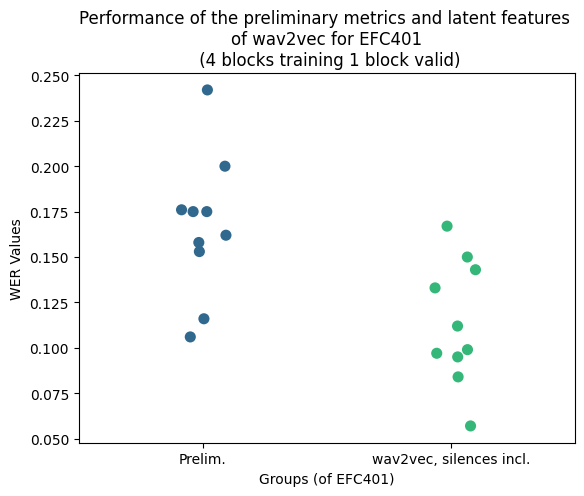

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# from scipy.stats import ranksums

wer_orig_5block = [0.158, 0.116, 0.162, 0.153, 0.176, 0.175, 0.106, 0.200, 0.242, 0.175]
wer_w2v_5block = [0.084, 0.057, 0.143, 0.095, 0.112, 0.133, 0.097, 0.099, 0.15,0.167]

statistic, p = ranksums(wer_orig_5block, wer_w2v_5block, alternative='two-sided')
print(p)

data = [wer_orig_5block, wer_w2v_5block]

group_labels = ['Prelim.', 'wav2vec, silences incl.']

sns.stripplot(data=data, jitter=True, color='black', size=8, palette='viridis')
plt.xticks(range(len(data)), group_labels)  # Set x-axis ticks and labels

# Add labels
plt.xlabel('Groups (of EFC401)')
plt.ylabel('WER Values')
plt.title('Performance of the preliminary metrics and latent features \nof wav2vec for EFC401\n (4 blocks training 1 block valid)')

# Show the plot
# plt.show()

import tikzplotlib

tikzplotlib.save("test.tex")
